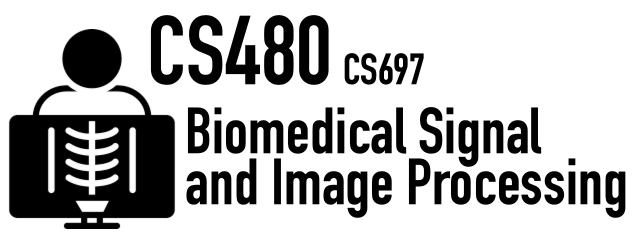
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

221 dcm image files which are the slices.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

This is the 2D View with coronal, saggital and axial in blue, red and green:


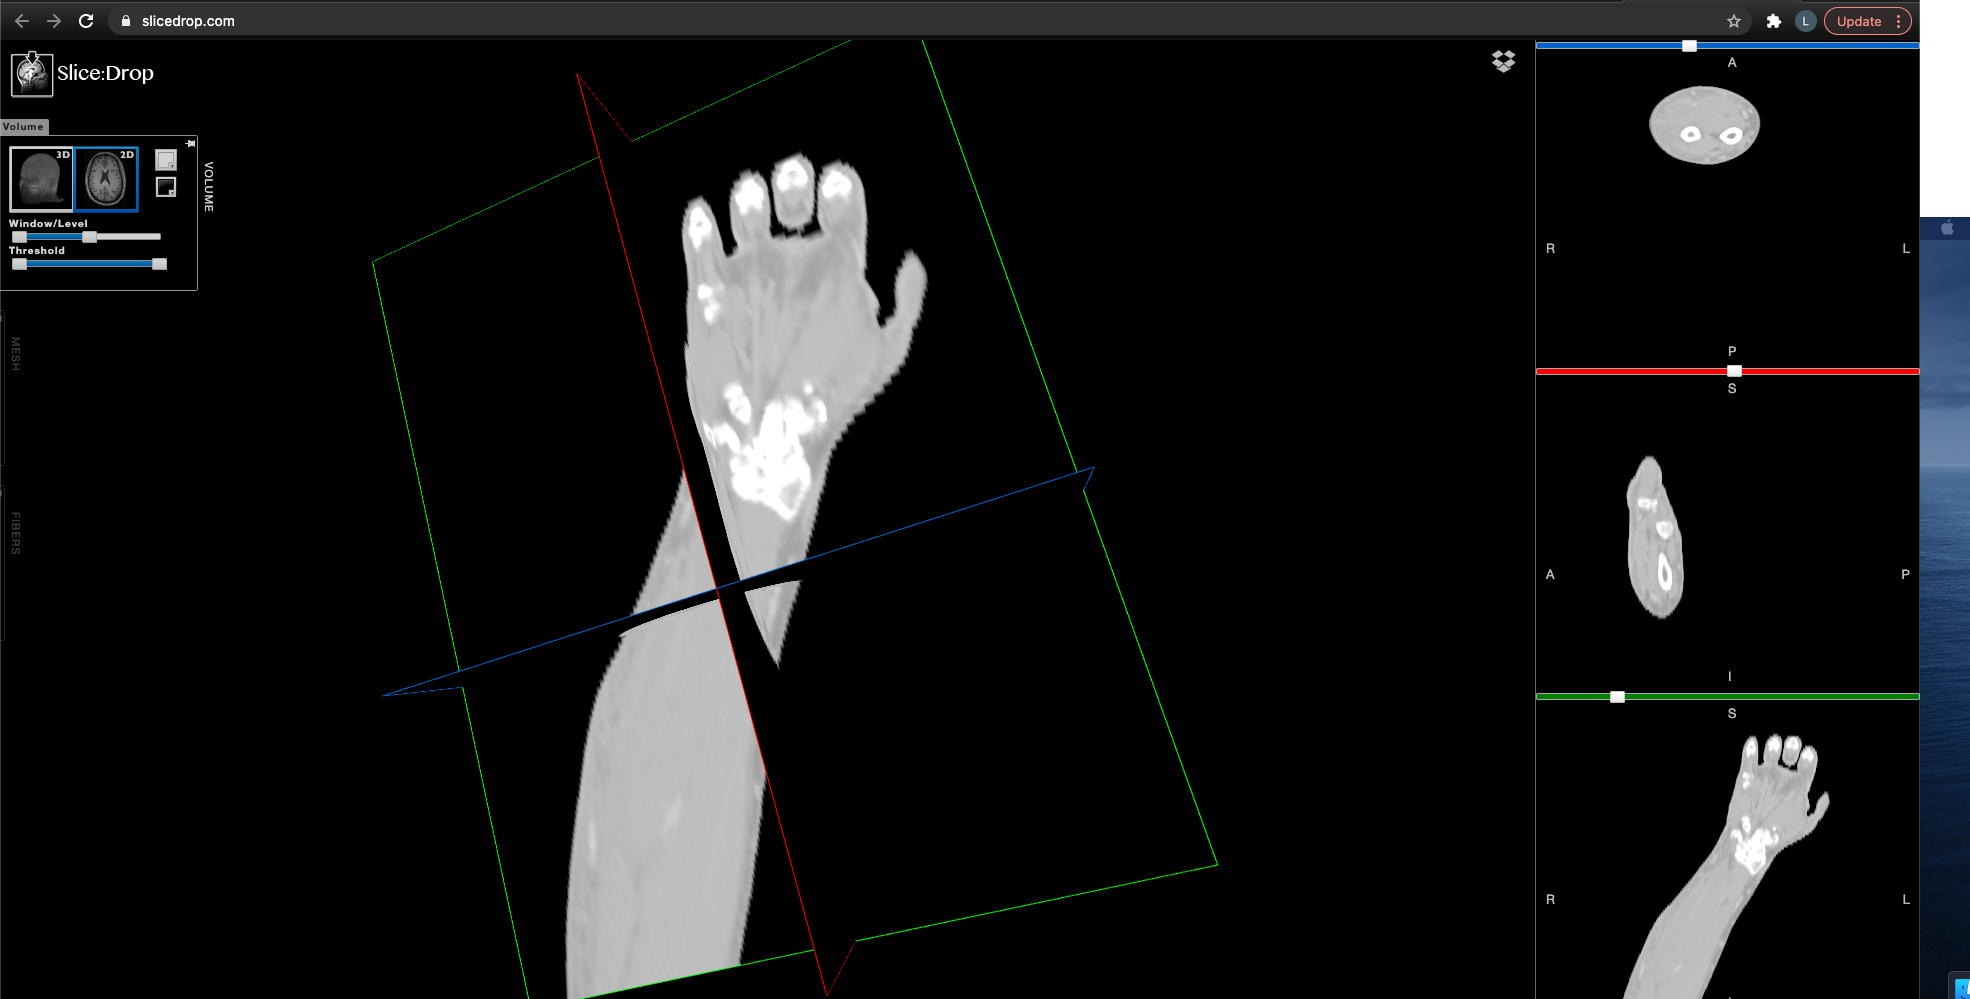

If we switch the volume to the 3D view we get the slices stacked on top of each other which results in the volume of an arm:


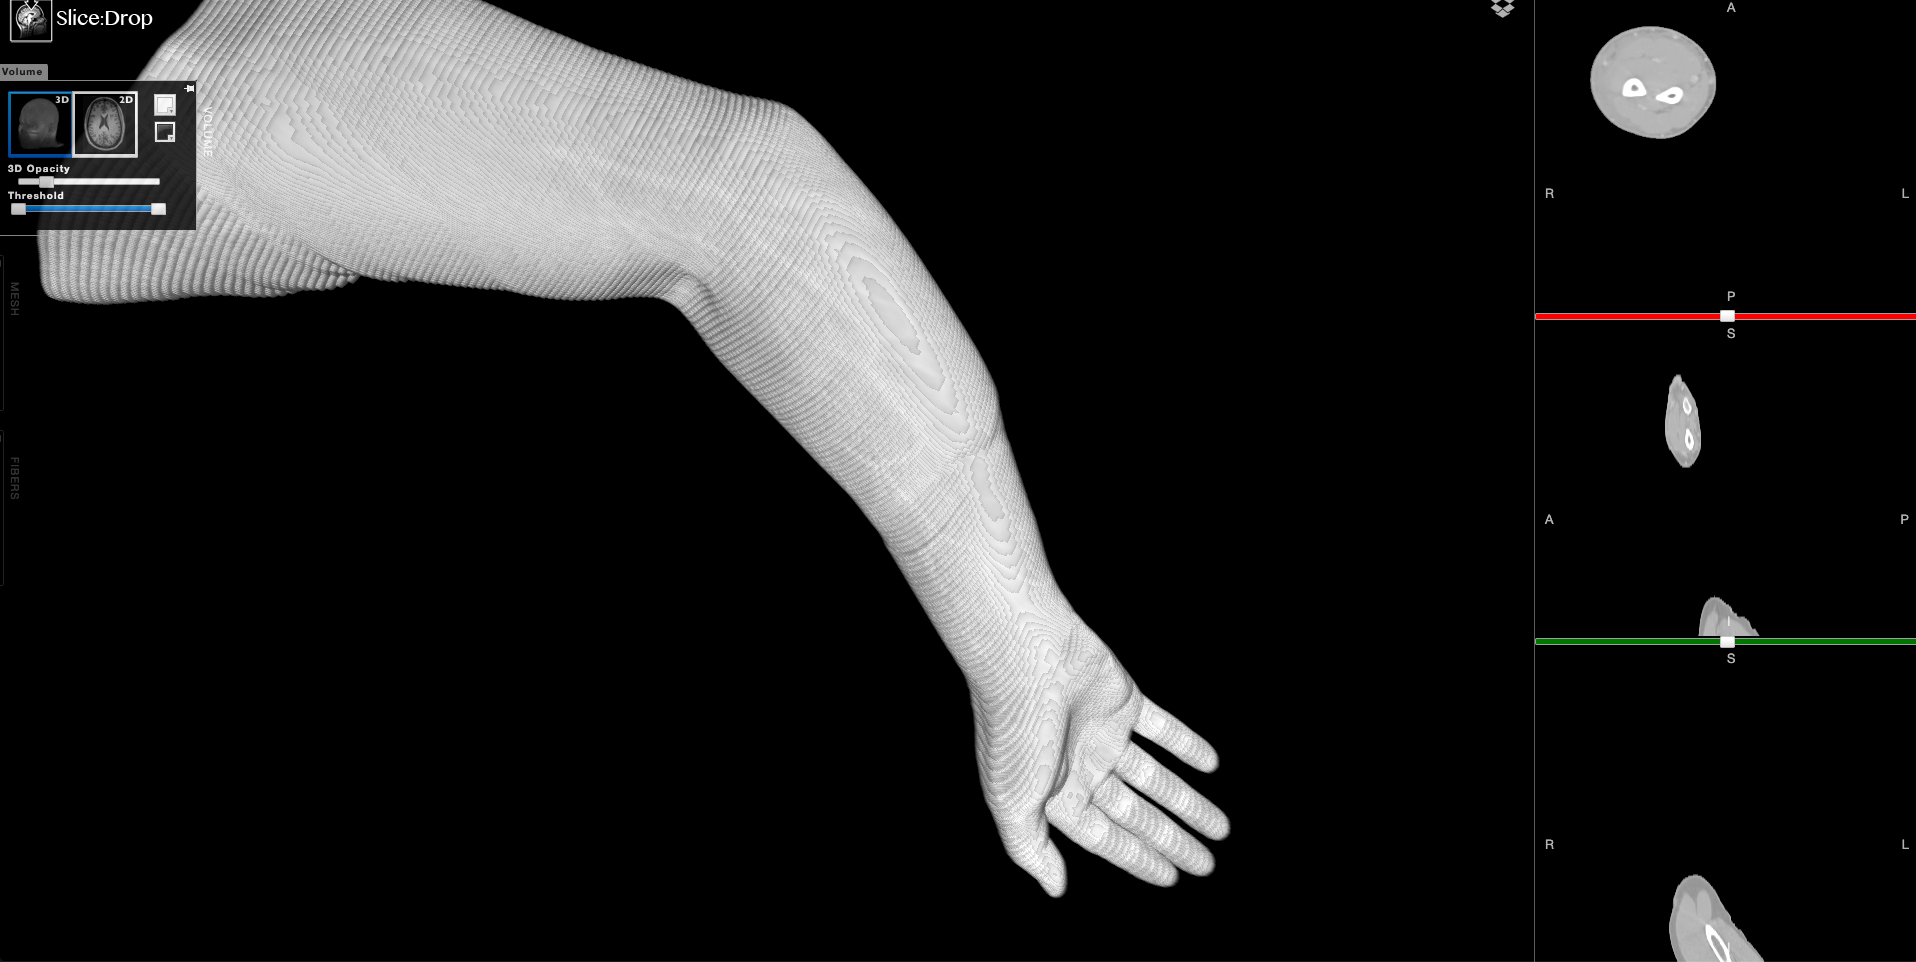

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [3]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

In [4]:
from pydicom import dcmread

In [5]:
import os
import pydicom

In [6]:
# get the files and sort them
DIR = 'ct/'
ct_files = sorted(os.listdir( DIR ))

In [7]:
# get dimensions of the first image
img1 = pydicom.dcmread( DIR + ct_files[0])
img1.pixel_array.shape


(454, 512)

In [8]:
# all images have the same dimensions, so we can save it
dimension = list(img1.pixel_array.shape)

In [10]:
dimension

[454, 512]

In [22]:
num_files = len(ct_files)

In [12]:
# create the array with image dimensions similarly to the previous homework:
ct_images = np.zeros( num_files, dimension[0], dimension[1]))

In [14]:
for i in range(num_files):
  loaded_image = pydicom.dcmread( DIR + ct_files[i])
  ct_images[i, :, :] = loaded_image.pixel_array

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

There is code from the Pydicom documentation here doing exactly this: 
https://pydicom.github.io/pydicom/dev/auto_examples/image_processing/reslice.html

However, I think we can write this in an easier way:

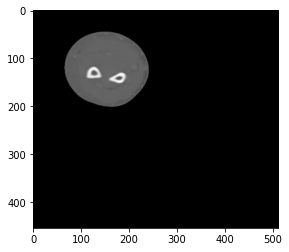

In [37]:
# TODO: YOUR CODE FOR AXIAL
# the slices are already axial, so we just take the middle slice:
a = plt.subplot()
plt.imshow(ct_images[num_files//2, :, :], cmap='gray')
a.set_aspect(ax)
# this slice show the lower arm with ulna and radius:

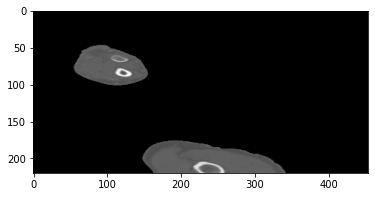

In [79]:
# TODO: YOUR CODE FOR SAGITTAL
s = plt.subplot()
plt.imshow(ct_images[:, :, dimension[1]//2], 'gray')
# sagittal showing a part of lower and upper arm:

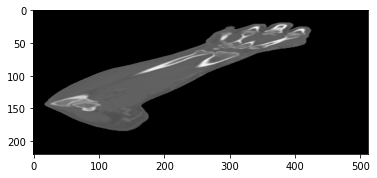

In [77]:
# TODO: YOUR CODE FOR CORONAL
c = plt.subplot()
plt.imshow(ct_images[:, dimension[0]//4, :], cmap='gray' )
# instead of dimension[0]//4 I can also pick any other slice:
# if we want the slice in the middle, we pick dimension[0]//2, however, on this coronal slice we can see the arm very well :)

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [102]:
center_slice = pydicom.dcmread( DIR + ct_files[110])

In [103]:
# only works to get the value with 0x:
center_slice[0x0028, 0x1050].value

"30.0"

In [104]:
window_center = center_slice[0x0028, 0x1050].value
window_width = center_slice[0x0028, 0x1051].value

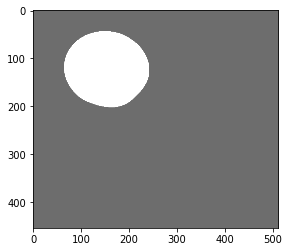

In [108]:
level = window_center
window = window_width
vmin = level - window/2
vmax = level + window/2
plt.imshow(center_slice.pixel_array, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [111]:
def convert_to_hu(dicom_file):
    pixel_values = dicom_file.pixel_array
    new_pixel_values = (pixel_values * dicom_file.RescaleSlope) + dicom_file.RescaleIntercept
    return new_pixel_values

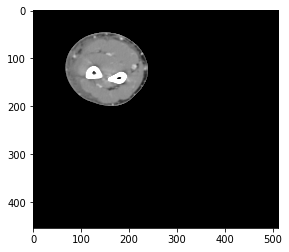

In [117]:
hu_pixels = convert_to_hu(center_slice)
plt.imshow(hu_pixels, cmap='gray', vmin=vmin, vmax=vmax)

In [ ]:
# Which values make sense and why?

In [114]:
hu_pixels.max()

1747.0

In [115]:
hu_pixels.min()

-1024.0

The Hounsfield Units are usually between -1000 and +1000. Here, the values are between -1024 and 1747. So, we get a better visualization by using rescale intercept and slope. 

Higher hounsfield units >1000 will improve the visualization of bones, which we can see in the image above (the two bones are shown very bright).


**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

In [ ]:
# TODO: YOUR CODE TO SEGMENT FAT

We could just look up the different hounsfield units for each type of tissue and set the thresholds:



In [144]:
# fat ranges from around -205 to 50 (I depicted the values from a table online)
threshold_min = ((-205 - center_slice.RescaleIntercept) //  center_slice.RescaleSlope)
threshold_max = ((50 - center_slice.RescaleIntercept) //  center_slice.RescaleSlope)

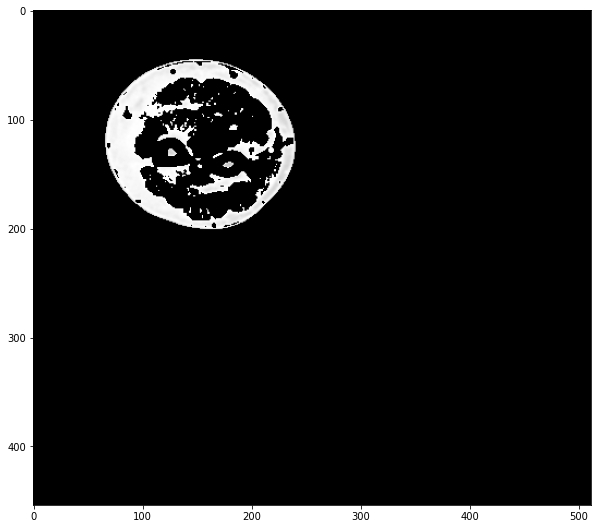

In [145]:
new_mask = center_slice.pixel_array.copy()
new_mask[new_mask < threshold_min] = 0
new_mask[new_mask > threshold_max] = 0
plt.figure(figsize = (10,10))
plt.imshow(new_mask, 'gray')

We can nicely see the fat tissue in white.


In [ ]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE

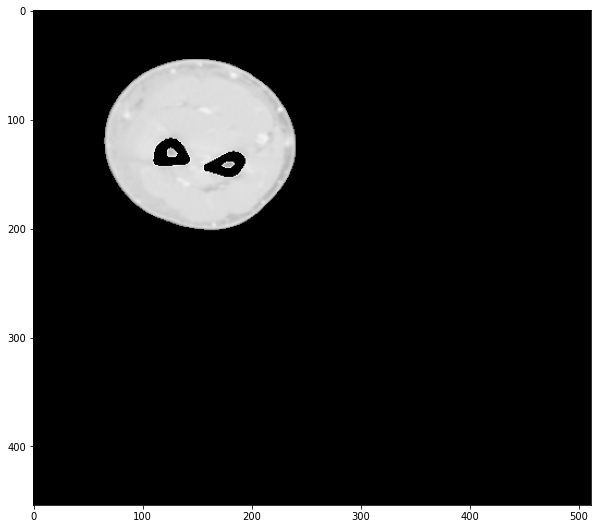

In [142]:
# soft tissue ranges from around -700 to 225
threshold_min = ((-700 - center_slice.RescaleIntercept) //  center_slice.RescaleSlope)
threshold_max = ((225 - center_slice.RescaleIntercept) //  center_slice.RescaleSlope)
new_mask = center_slice.pixel_array.copy()
new_mask[new_mask < threshold_min] = 0
new_mask[new_mask > threshold_max] = 0
plt.figure(figsize = (10,10))
plt.imshow(new_mask, 'gray')

This shows all the tissue (fat, muscles etc.) except bones.

In [ ]:
# TODO: YOUR CODE TO SEGMENT BONES

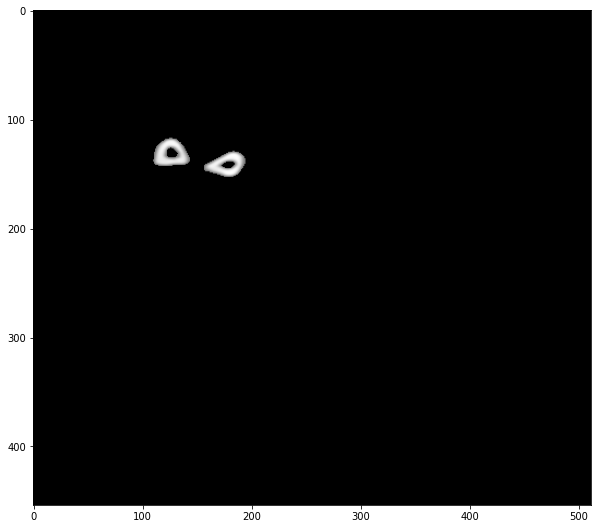

In [146]:
# bones range from around 226 to over 3000 (we don't need a max)
threshold_min = ((226 - center_slice.RescaleIntercept) //  center_slice.RescaleSlope)
new_mask = center_slice.pixel_array.copy()
new_mask[new_mask < threshold_min] = 0
plt.figure(figsize = (10,10))
plt.imshow(new_mask, 'gray')

In [ ]:
# Are the segmentations good?

When the hounsfield units are picked correctly I think the segmentations are good. However, it also depends on the image resolution, we can see for example in the soft tissue case the single pixels around the bones.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""